In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#from sklearn.externals import joblib

In [ ]:
dataset = pd.read_csv("training.csv")

In [ ]:
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 800],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Accurancy =0.9642643291493813
best parameters ={'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 800}


In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features='log2', n_estimators=200, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
test_data=pd.read_csv('testing.csv')

In [ ]:
preds=classifier.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
test_data['Result']=preds
submission=test_data.loc[:,['key','Result']]
submission.to_csv('accuracycheck1.csv',index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 950   48]
 [  30 1211]]


In [ ]:
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])

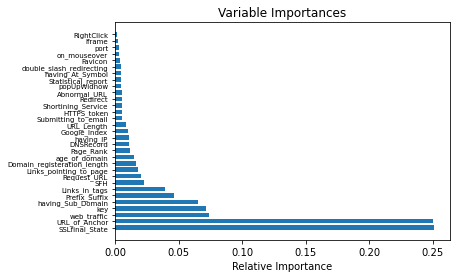

In [ ]:
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.7)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()